## What are the weights and bias for the AND perceptron?

<img src="assets/and-perceptron.png" width=900px>

Set the weights (`weight1`, `weight2`) and bias (`bias`) to values that will correctly determine the AND operation as shown above.
More than one set of values will work!

In [4]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 1
bias = -2


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                    -2                    0          Yes
      0          1                    -1                    0          Yes
      1          0                    -1                    0          Yes
      1          1                     0                    1          Yes


## OR Perceptron

<img src="assets/or-perceptron.png" width=900px>

The OR perceptron is very similar to an AND perceptron. In the image below, the OR perceptron has the same line as the AND perceptron, except the line is shifted down. What can you do to the weights and/or bias to achieve this? Use the following AND perceptron to create an OR Perceptron.

<img src="assets/and-to-or-perceptron.png" width=900px>

    Q. What are two ways to go from an AND perceptron to an OR perceptron?
        1. Increase the weights
        2. Decrease the magnitude of the bias

## NOT Perceptron
Unlike the other perceptrons we looked at, the NOT operation only cares about one input. The operation returns a `0` if the input is `1` and a `1` if it's a `0`. The other inputs to the perceptron are ignored.

In this quiz, you'll set the weights (`weight1`, `weight2`) and bias `bias` to the values that calculate the NOT operation on the second input and ignores the first input.

In [5]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0
weight2 = -1
bias = 0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                     0                    1          Yes
      0          1                    -1                    0          Yes
      1          0                     0                    1          Yes
      1          1                    -1                    0          Yes


## XOR Perceptron

<img src="assets/xor-perceptron.png" width=900px>

## Quiz: Build an XOR Multi-Layer Perceptron

Now, let's build a multi-layer perceptron from the AND, NOT, and OR perceptrons to create XOR logic!

The neural network below contains 3 perceptrons, A, B, and C. The last one (AND) has been given for you. The input to the neural network is from the first node. The output comes out of the last node.

The multi-layer perceptron below calculates XOR. Each perceptron is a logic operation of AND, OR, and NOT. However, the perceptrons A, B, and C don't indicate their operation. In the following quiz, set the correct operations for the perceptrons to calculate XOR.

<img src="assets/xor-nn.png" width=900px>

Q. Set the operations for the perceptrons in the XOR neural network.
1. A -> `AND`

2. B -> `OR`

3. C -> `NOT`

## Perceptron Algorithm
And now, with the perceptron trick in our hands, we can fully develop the perceptron algorithm! The following image will show you the pseudocode, and in the quiz below, you'll have the chance to code it in Python.

<img src="assets/perceptron-pseudo-code.PNG" width=900px>

## Coding the Perceptron Algorithm
Time to code! In this quiz, you'll have the chance to implement the perceptron algorithm to separate the following data (given in the file data.csv).


Recall that the perceptron step works as follows. For a point with coordinates *(p,q)*, label *y*, and prediction given by the equation $$\hat{y} = step(w_1x_1 + w_2x_2 + b)$$

* If the point is correctly classified, do nothing.
 
* If the point is classified positive, but it has a negative label, subtract $\alpha p,\alpha q,$ and $\alpha$ from $w_1, w_2$, and $b$ respectively.
 
* If the point is classified negative, but it has a positive label, add $\alpha p,\alpha q,$ and $\alpha$ to $w_1, w_2$, and $b$ respectively.

Then **run the test cell** to graph the solution that the perceptron algorithm gives you. It'll actually draw a set of dotted lines, that show how the algorithm approaches to the best solution, given by the black solid line.

Feel free to play with the parameters of the algorithm (number of epochs, learning rate, and even the randomizing of the initial parameters) to see how your initial conditions can affect the solution!



In [6]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


### Run following cell to test your solution

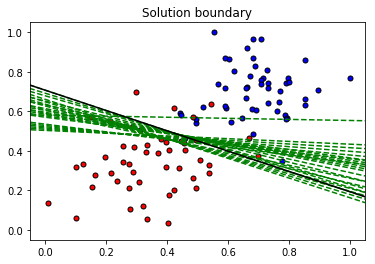

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

def test(X, y):
    boundary_lines = trainPerceptronAlgorithm(X, y)
    
    for w, b in boundary_lines:
        display(w, b)
    
    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(boundary_lines[-1][0], boundary_lines[-1][1], 'black')
    
    # Plotting the data
    plot_points(X, y)
    plt.show()

# data processing
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
# plot_points(X,y)
# plt.show()

# test run
test(X, y)

## Coding Softmax

Code the formula for the Softmax function in Python. You can use numpy.

In [1]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    pass